In [1]:
import pandas as pd

## 1. Frequency Table
- **Frequency Table** grouping of qualitative data into mutually exclusive classes showing the number of observation in each class


In [2]:
data_path = "data/hotel_bookings.csv"
df = pd.read_csv(data_path)
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
# Make frequency table
df.reservation_status.value_counts()

reservation_status
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64

## 2. Bar Charts
- **Bar Chart** is a graphic representation of the frequency distribution
- A graph in which the classes are reported on the horizontal axis and the class frequencies on the vertical axis
- The class frequencies are proportional to the heights of the bars

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

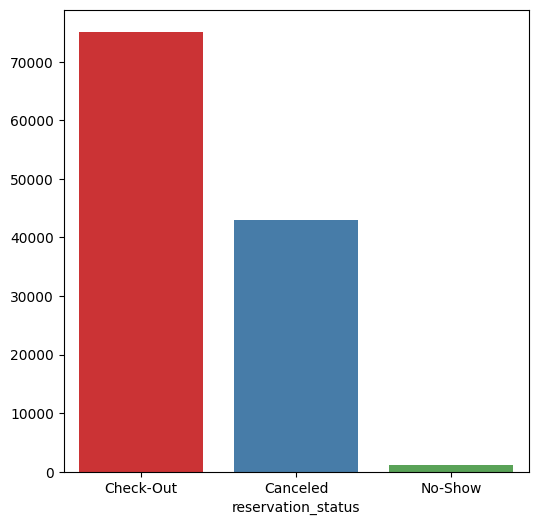

In [5]:
plt.subplots(figsize=(6, 6))
sns.set_palette('Set1')  # Set color palette
reservation_frequency = df.reservation_status.value_counts()
sns.barplot(x=reservation_frequency.index, y=reservation_frequency.values, orient='v')
plt.show()

## 3. Pie Charts
* **Pie Charts** that shows the proportion or percent that each class represents of the total number of requencies

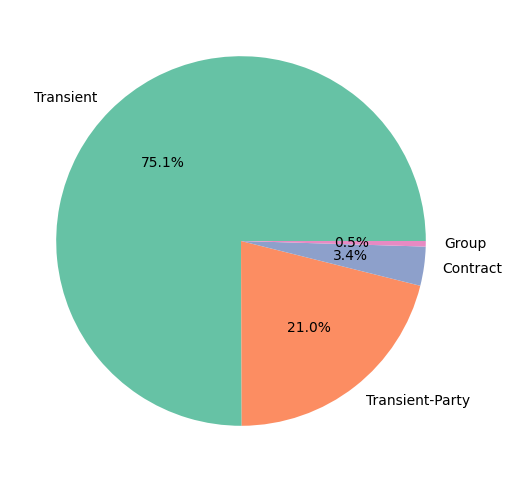

In [6]:
plt.figure(figsize=(6, 6))
customer_type_freq = df.customer_type.value_counts()
sns.set_palette('Set2')  # Set color palette
plt.pie(customer_type_freq.values, labels=customer_type_freq.index, autopct='%1.1f%%')
plt.show()

## 4. Relative Class Frequencies
* Class frequencies can be converted to relative class frequencies to show the fraction of the total number of observations in each class
* A relative frequency captures the relationship between a class total and the total number of observation

In [7]:
reserved_room_type_freq = df.reserved_room_type.value_counts()
relative_freq = reserved_room_type_freq / len(df)
relative_reserved_room_freq = pd.DataFrame(
    {'reserved_room_type': reserved_room_type_freq.index,
     'proportion': relative_freq.values})
relative_reserved_room_freq

,reserved_room_type,proportion
0,A,0.720278
1,D,0.160826
2,E,0.054737
3,F,0.024265
4,G,0.017539
5,B,0.009364
6,C,0.007806
7,H,0.005034
8,P,0.000101
9,L,0.000050


### Cumulative Frequency Distribution
* Starts with the first class and adds the frequency values or the %'s (relative frequency)

In [8]:
accumulated_freq = relative_freq.cumsum()
accumulated_reserved_room_freq = pd.DataFrame(
    {'reserved_room_type': reserved_room_type_freq.index,
     'quantity': reserved_room_type_freq.values,
     'proportion': relative_freq.values,
     'accumulated': accumulated_freq.values})
accumulated_reserved_room_freq

,reserved_room_type,quantity,proportion,accumulated
0,A,85994,0.720278,0.720278
1,D,19201,0.160826,0.881104
2,E,6535,0.054737,0.935841
3,F,2897,0.024265,0.960106
4,G,2094,0.017539,0.977645
5,B,1118,0.009364,0.987009
6,C,932,0.007806,0.994815
7,H,601,0.005034,0.999849
8,P,12,0.000101,0.999950
9,L,6,0.000050,1.000000


## 5. Frequency Distribution - Numeric Data
* Create from all unique values would be confusing
* Class intervals help simplify the frequency distribution

### 5.1 Step 1: Decide on the number of classes (k)
* A useful recipe to determine the number of classes (k) is the "2 to the k rule" such that $2^k > n$ 

**adr** stands for average daily rate, and it's used to measure the average revenue that a hotel receives for each occupied guest room per day

In [10]:
import numpy as np

In [11]:
# Find k
len_df = len(df)
k = np.ceil(np.log2(len_df))
#checking
k, 2**k > len_df

(17.0, True)

### 5.2 Determine the class interval or width
* The formula is: $i >= \frac{H-L}{k}$, where i is the class interval, H is the highest observed value, L is the lowest observed value and k is the number of classes

In [12]:
L, H = df.adr.quantile([0.02, 0.98]).values
L, H = int(L), round(H)
i = round((H-L)/k)
L, H, i

(21, 230, 12)

In [13]:
ls_interval = []
ls_checkpoint = list(range(int(L), round(H), i))
for index in ls_checkpoint:
    ls_interval.append([index, index+i])
ls_interval

[[21, 33],
 [33, 45],
 [45, 57],
 [57, 69],
 [69, 81],
 [81, 93],
 [93, 105],
 [105, 117],
 [117, 129],
 [129, 141],
 [141, 153],
 [153, 165],
 [165, 177],
 [177, 189],
 [189, 201],
 [201, 213],
 [213, 225],
 [225, 237]]

In [14]:
#or 
np.linspace(L, H, int(k))

array([ 21.    ,  34.0625,  47.125 ,  60.1875,  73.25  ,  86.3125,
        99.375 , 112.4375, 125.5   , 138.5625, 151.625 , 164.6875,
       177.75  , 190.8125, 203.875 , 216.9375, 230.    ])

### 5.3 Set the individual class limits and make distribution frequency

In [16]:
def assign_interval(x):
  if x < ls_checkpoint[0]:
    return f'->{ls_checkpoint[0]}'
  if x > ls_checkpoint[-1]:
    return f'{ls_checkpoint[-1]}->'
  for lower, upper in ls_interval:
    if lower <= x < upper:
      return f'{lower}->{upper}'
  return ''

In [17]:
assiged_interval = df.adr.apply(assign_interval)
assiged_interval

0             ->21
1             ->21
2           69->81
3           69->81
4          93->105
            ...   
119385     93->105
119386       225->
119387    153->165
119388     93->105
119389    141->153
Name: adr, Length: 119390, dtype: object

In [18]:
custom_order = [f'->{ls_checkpoint[0]}']
custom_order.extend([f'{ls_checkpoint[i]}->{ls_checkpoint[i+1]}' for i in range(len(ls_checkpoint)-1)])
custom_order.append(f'{ls_checkpoint[-1]}->')

In [19]:
# make distribution frequency
adr_freq = assiged_interval.value_counts().reindex(custom_order)
adr_freq

adr
->21         2381
21->33       1460
33->45       4904
45->57       6368
57->69      14539
69->81      14727
81->93      13763
93->105     12802
105->117    11470
117->129     8992
129->141     7979
141->153     4331
153->165     3855
165->177     3132
177->189     1877
189->201     1920
201->213     1226
213->225      920
225->        2652
Name: count, dtype: int64

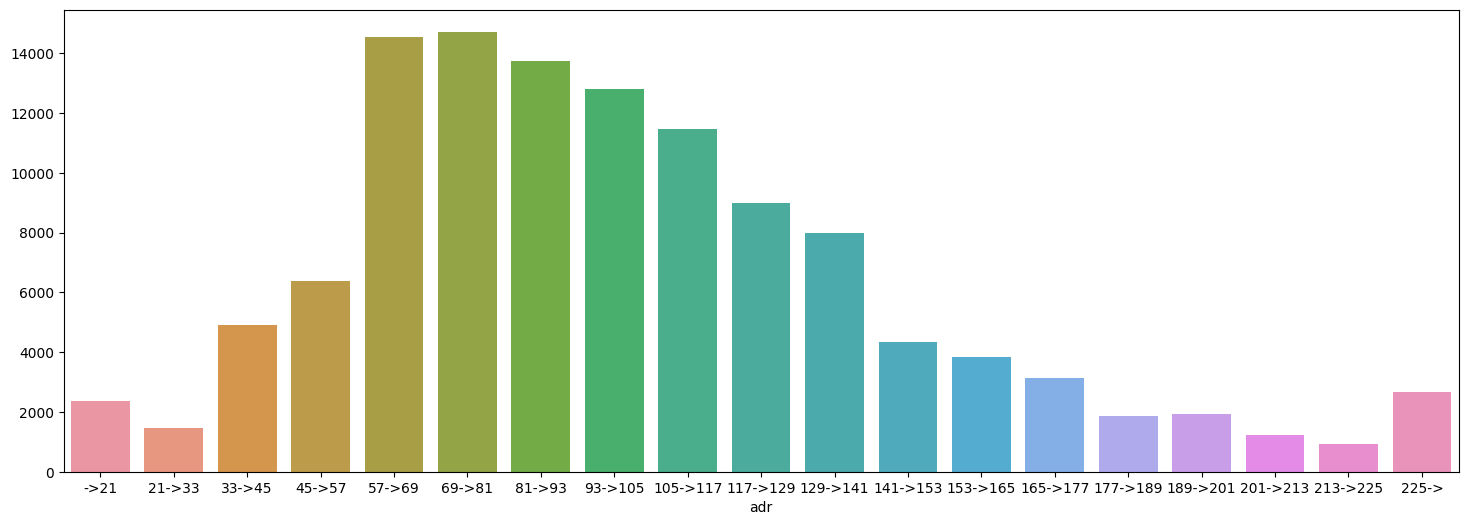

In [21]:
plt.subplots(figsize=(18, 6))
sns.set_palette('Set1')  # Set color palette
sns.barplot(x=adr_freq.index, y=adr_freq.values, orient='v')
plt.show()

### 5.4 Using Histplot

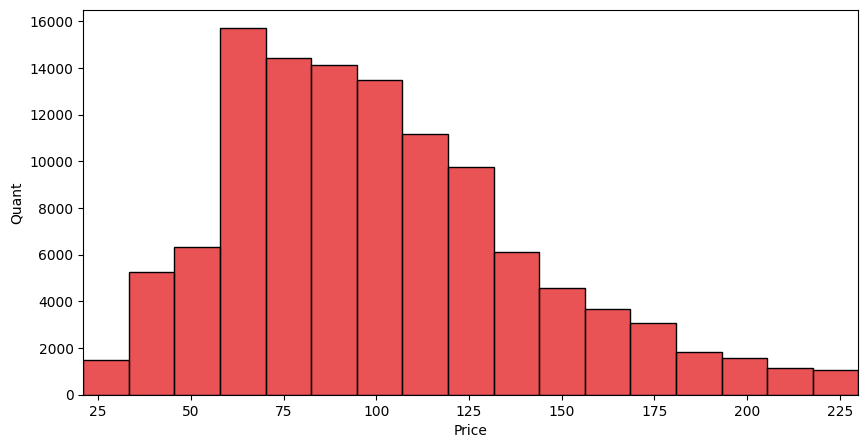

In [25]:
data = df.adr
filtered_data = data[(data >= L) & (data <= H)]
plt.figure(figsize=(10,5))
plt.xlim(L, H)
plt.xlabel('Price')
plt.ylabel('Quant')
sns.histplot(filtered_data, bins=round(k), kde=False)
# sns.kdeplot(filtered_data ,fill=True)
plt.show()